In [15]:
import fastf1 as f1
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
session = f1.get_session(2025, 13, "SQ") # optional: backend = "fastf1"
session.load(telemetry = False, weather = True)

req         WARNING 	DEFAULT CACHE ENABLED! (510.88 MB) /home/studio-lab-user/.cache/fastf1
core           INFO 	Loading data for Belgian Grand Prix - Sprint Qualifying [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has be

In [5]:
q1, q2, q3 = session.laps.split_qualifying_sessions()

In [44]:
q2.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [36]:
q2_hot = q2[q2.IsAccurate & ~q2.Deleted]
weather_data = q2_hot.get_weather_data().reset_index(drop = True)

In [40]:
q2_hot_full = pd.concat([q2_hot.reset_index(drop = True), weather_data.loc[:, ~(weather_data.columns == 'Time')]], axis = 1)
#q2_full[pd.notna(q2_full.AirTemp)]

20

In [54]:
q2_hot_full.Driver.value_counts()

Driver
NOR    4
PIA    2
TSU    2
RUS    1
LEC    1
STR    1
VER    1
ALO    1
HAD    1
BOR    1
SAI    1
LAW    1
OCO    1
GAS    1
BEA    1
Name: count, dtype: int64

In [59]:
real_data = q2_hot_full[q2_hot_full.LapTime.dt.total_seconds() < 120]
real_data.Team.value_counts()

Team
McLaren            3
Red Bull Racing    2
Racing Bulls       2
Aston Martin       2
Haas F1 Team       2
Ferrari            1
Mercedes           1
Williams           1
Kick Sauber        1
Alpine             1
Name: count, dtype: int64

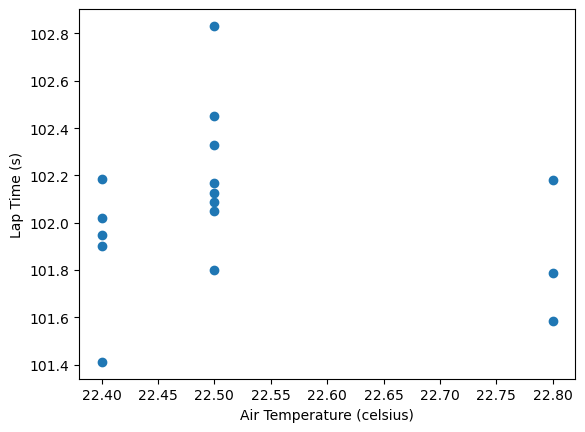

In [60]:
plt.scatter(real_data.AirTemp, real_data.LapTime.dt.total_seconds())
plt.xlabel("Air Temperature (celsius)")
plt.ylabel("Lap Time (s)")
plt.show()

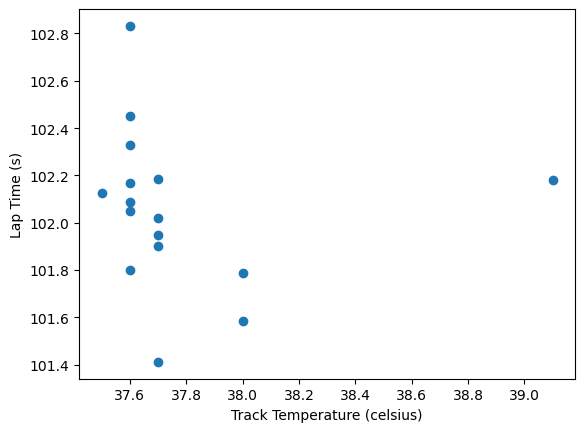

In [53]:
plt.scatter(real_data.TrackTemp, real_data.LapTime.dt.total_seconds())
plt.xlabel("Track Temperature (celsius)")
plt.ylabel("Lap Time (s)")
plt.show()